# Лабораторная работа № 4
1. В рабочем файле excel создать новую (фиктивную) переменную. Значения переменной задать вручную по следующему правилу: «1» если страна расположена в Европе, «0» В противном случае. 
2. Ввести фиктивную переменную в  уравнение множественной регрессии в аддитивном виде (влияние на свободный член модели) и мультипликативном виде (влияние на коэффициент при факторной переменной). 
3. Сделать вывод о статистической значимости включения в модель фиктивной переменной с помощью проверки линейной гипотезы. 
4. Проведите тест Вальда. Сделайте выводы. 
5. Как изменилось фиктивной переменной? качество -80- модели после включения 
6. Предложите свою фиктивную переменную и выберите нужную спецификацию, в соответствии с которой может быть получена наилучшая модель. Проверьте свое предположение. 


## 0. Загрузка данных

In [21]:
import pandas as pd
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
file_path = "Student.csv"
df = pd.read_csv(file_path)
df.head(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


# 1.  Создание фиктивной переменной  1 если частная школа, 0 если государственная

In [18]:
df['is_private'] = (df['School_Type'] == 'Private').astype(int)
print(df['is_private'].value_counts())

is_private
0    4598
1    2009
Name: count, dtype: int64


In [ ]:
# Очистка от пропусков
df = df.dropna(subset=['Exam_Score', 'Hours_Studied', 'School_Type'])

is_private
0    4598
1    2009
Name: count, dtype: int64


# 2. Создание переменных и регрессионной модели

In [22]:
# Целевая переменная
y = df['Exam_Score']

# ✅ Аддитивная модель: Exam_Score ~ Hours_Studied + is_private
X_add = df[['Hours_Studied', 'is_private']]
X_add = sm.add_constant(X_add)

model_add = sm.OLS(y, X_add).fit()
print("\nАддитивная модель:")
print(model_add.summary())


Аддитивная модель:
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     817.8
Date:                Sat, 24 May 2025   Prob (F-statistic):          4.68e-318
Time:                        00:41:50   Log-Likelihood:                -17619.
No. Observations:                6607   AIC:                         3.524e+04
Df Residuals:                    6604   BIC:                         3.526e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            61.4339  

1. const (свободный член)	61.43	< 0.001	Средний балл в гос. школе при 0 часах учебы
2. Hours_Studied	0.289	< 0.001	Значимый положительный эффект
3. is_private	0.076	0.415	❌ Не значима


Показатель->Значение->Что значит
```
R² = 0.199 → модель объясняет ~19.9% дисперсии итогового балла (Exam_Score).
F-statistic = 817.8, Prob(F) = 4.68e-318 → модель в целом значима (не все коэффициенты)
Не влияет статистически значимо на экзаменационную оценку при учёте количества часов учёбы.

Фиктивная переменная is_private не улучшаeт модель, не является значимой, и не даёт прироста к предсказательной силе.
```

In [24]:
df['interaction'] = df['Hours_Studied'] * df['is_private']

X_mult = df[['Hours_Studied', 'is_private', 'interaction']]
X_mult = sm.add_constant(X_mult)

model_mult = sm.OLS(y, X_mult).fit()
print("\nМультипликативная модель:")
print(model_mult.summary())


Мультипликативная модель:
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     545.7
Date:                Sat, 24 May 2025   Prob (F-statistic):          7.37e-317
Time:                        00:43:31   Log-Likelihood:                -17618.
No. Observations:                6607   AIC:                         3.524e+04
Df Residuals:                    6603   BIC:                         3.527e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            61

In [25]:
print("\nP-value (is_private):", model_add.pvalues['is_private'])


P-value (is_private): 0.4152012498612251


In [26]:
wald_result = model_mult.f_test("is_private = 0, interaction = 0")
print("\nWald Test:")
print(wald_result)


Wald Test:
<F test: F=1.0500935927325634, p=0.3499634254033986, df_denom=6.6e+03, df_num=2>


In [27]:
X_base = sm.add_constant(df[['Hours_Studied']])
model_base = sm.OLS(y, X_base).fit()

print("\nСравнение R²:")
print("Базовая модель:", model_base.rsquared)
print("Аддитивная модель:", model_add.rsquared)
print("Мультипликативная модель:", model_mult.rsquared)


Сравнение R²:
Базовая модель: 0.19843011611020944
Аддитивная модель: 0.19851069485805428
Мультипликативная модель: 0.1986849868541367


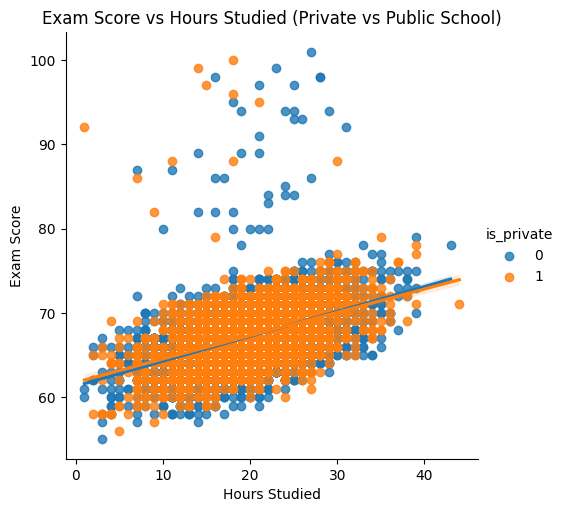

In [28]:
sns.lmplot(x='Hours_Studied', y='Exam_Score', hue='is_private', data=df)
plt.title("Exam Score vs Hours Studied (Private vs Public School)")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()